In [3]:
import pandas as pd
import numpy as np
import krippendorff
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import json
import csv
from pathlib import Path
from datetime import datetime
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

## IWG Hate Speech Dataset

In [61]:
#data_path = Path(__file__).resolve().parents[1] / 'data' / 'iwg_hatespeech_public' / "german hatespeech refugees.csv"
data_path = "data/iwg_hatespeech_public/german hatespeech refugees.csv"

In [62]:
data_df = pd.read_csv(data_path, usecols = [1,2])

In [63]:
reliability_data = data_df.T.to_numpy(dtype = np.dtype('U'))

In [65]:
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=reliability_data, level_of_measurement = "nominal"))

Krippendorff's alpha for nominal metric:  0.38290305584826134


## Telegram HS Dataset

In [217]:
data_path = "data/telegram/annotated_dataset.txt"

In [218]:
with open(data_path, 'r') as f:
    data_json = json.load(f)

In [219]:
annotation_list = []
gold_np = []
for entry in data_json["messages"]:
    annotation_list.append(entry["raw_annotations"])
    gold_np.append(entry["gold_label"])

In [220]:
mapping = {"NEUTRAL" : 0.0, "OFFENSIVE_ABUSIVE": 1.0, np.nan : np.nan}

In [221]:
annotations_np = pd.DataFrame(annotation_list).T.values.tolist()

In [222]:
annotations = []
for i in range(len(annotations_np)):
    annotator = []
    for j in range(len(annotations_np[0])):
        annotator.append(mapping[annotations_np[i][j]])
    annotations.append(annotator)

In [223]:
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=annotations, level_of_measurement = "nominal"))

Krippendorff's alpha for nominal metric:  0.7387221322705193


In [224]:
gold = []
for i in range(len(gold_np)):
    gold.append(mapping[gold_np[i]])

In [225]:
alphas = []
for annotator in annotations:
    to_compare = [annotator,gold]
    alphas.append(krippendorff.alpha(reliability_data=to_compare, level_of_measurement='nominal'))

/home/markus/.local/lib/python3.8/site-packages/krippendorff/krippendorff.py:297: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (o * d).sum() / (e * d).sum()


In [231]:
alphas = sorted(alphas, reverse=True)

In [232]:
alphas

[0.9635003306878307,
 0.8969422423556059,
 0.8950170947325045,
 0.8498684210526316,
 0.7732326627708538,
 nan]

In [236]:
# remove annotator_6
alphas = alphas[:5]

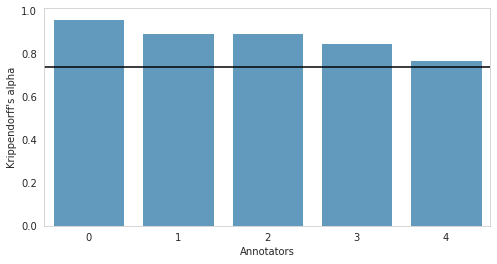

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime

colors = sns.color_palette("Blues")
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.linewidth':0})

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax = sns.barplot(x=list(range(len(alphas))), y=alphas, color=colors[3])
ax.set(xlabel='Annotators', ylabel='Krippendorff\'s alpha')
line = ax.axhline(krippendorff.alpha(reliability_data=annotations,level_of_measurement='nominal'), color='black')

In [239]:
now = datetime.now()
import os
path_fig = "./framework_results/"+"inter-rater_reliability_"+now.strftime("%Y-%m-%d_%H-%M-%S")+"/"
if os.path.exists(path_fig) == False:
        os.makedirs(path_fig)
fig.savefig(path_fig + "inter-rater-reliability.pdf", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.png", bbox_inches='tight', dpi=300)
fig.savefig(path_fig + "inter-rater-reliability.eps", bbox_inches='tight', dpi=600)